# Kelompok 5

# Import Library

In [59]:
import pandas as pd
import numpy as np

import os
import sys

# librosa adalah pustaka Python untuk menganalisis audio dan musik. 
# Ini dapat digunakan untuk mengekstrak data dari file audio yang akan kita lihat nanti.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# untuk memutar file audio
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv1D, Activation, BatchNormalization, Dropout, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
print("Python Version: {}".format(sys.version))

Python Version: 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]


In [12]:
# Menggunakan GPU dengan TensorFlow sebagai backend
import tensorflow as tf
print("Jumlah GPU Tersedia: ", len(tf.config.experimental.list_physical_devices('GPU')))

Jumlah GPU Tersedia:  2


# Inisiasi Dataset - Preprocessing

In [13]:
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(Ravdess)

### Menambahkan emosi, path, dan gender kedalam data frame

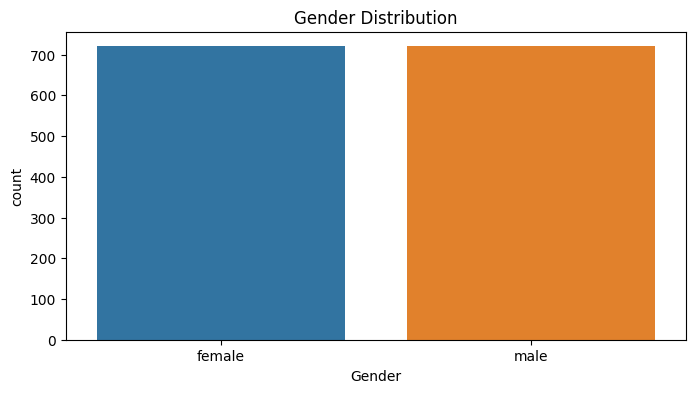

Emotions                                               Path  Gender
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...  female
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...  female
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...  female
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...  female
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...  female

In [14]:
file_emotion = []
file_path = []
file_gender = []

for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        # Tentukan jenis kelamin dari nomor aktor
        actor_number = int(dir.split('_')[-1])
        if actor_number % 2 == 0:
            file_gender.append('female')
        else:
            file_gender.append('male')

# Buat DataFrame untuk emosi, path, dan gender
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
gender_df = pd.DataFrame(file_gender, columns=['Gender'])

Ravdess_df = pd.concat([emotion_df, path_df, gender_df], axis=1)
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)

# Plot distribusi gender
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=Ravdess_df)
plt.title('Gender Distribution')
plt.show()

Ravdess_df.head()

### Membuat DataFrame ke csv

In [15]:
# creating Dataframe to csv
data_path = pd.concat([Ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path  Gender
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...  female
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...  female
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...  female
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...  female
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...  female

### Menghitung Dataset

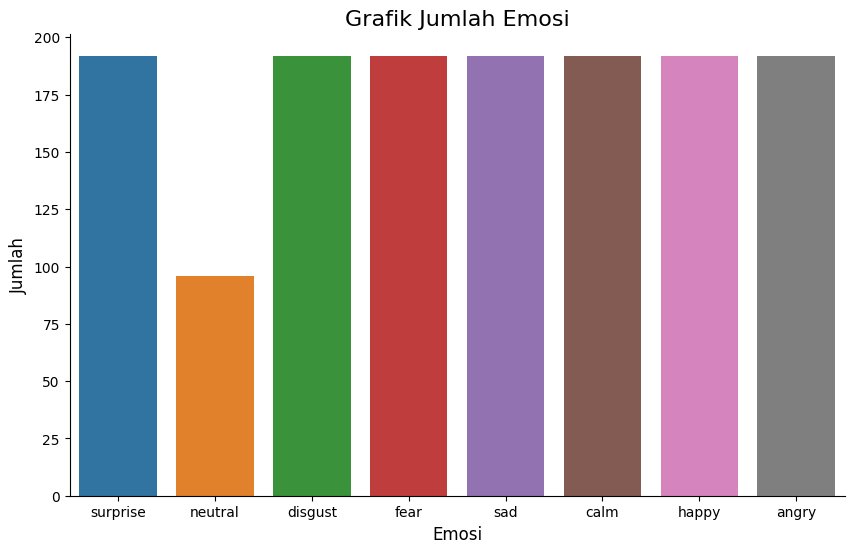

Detail Jumlah Emosi:
 Emotions
surprise    192
disgust     192
fear        192
sad         192
happy       192
calm        192
angry       192
neutral      96
Name: count, dtype: int64

Jumlah Total Emosi: 1440


In [16]:
# Plot distribusi emosi
plt.figure(figsize=(10, 6))
plt.title('Grafik Jumlah Emosi', size=16)
sns.countplot(x='Emotions', data=Ravdess_df)
plt.ylabel('Jumlah', size=12)
plt.xlabel('Emosi', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# Print jumlah total masing-masing emosi
total_emosi = Ravdess_df['Emotions'].value_counts()
print("Detail Jumlah Emosi:\n", total_emosi)

# Jumlahkan semua total emosi
sum_total_emosi = total_emosi.sum()
print(f"\nJumlah Total Emosi: {sum_total_emosi}")

### Tampilkan contoh audio dari dataset

In [17]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot untuk audio dengan emosi {}'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram untuk audio dengan emosi {}'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

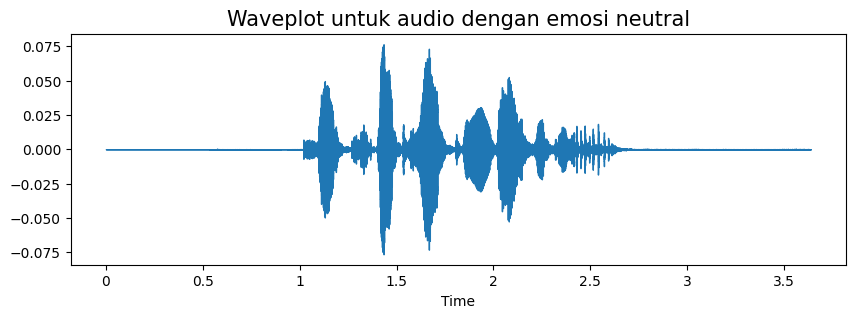

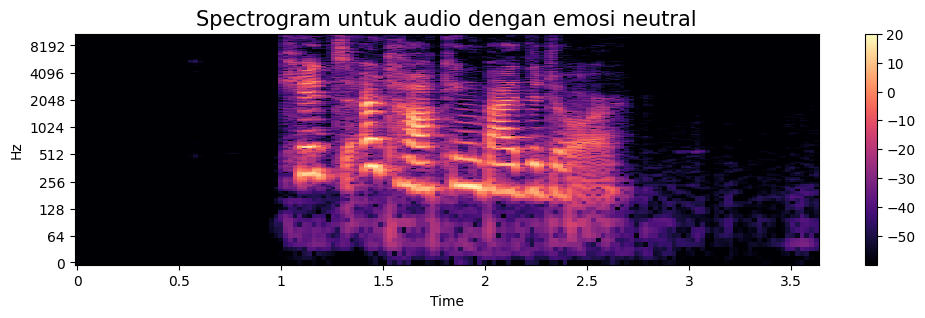

In [ ]:
# Mengasumsikan Ravdess_df dan data_path sudah terdefinisi dan memiliki format yang benar
emotion = 'neutral'  # Contoh emosi
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

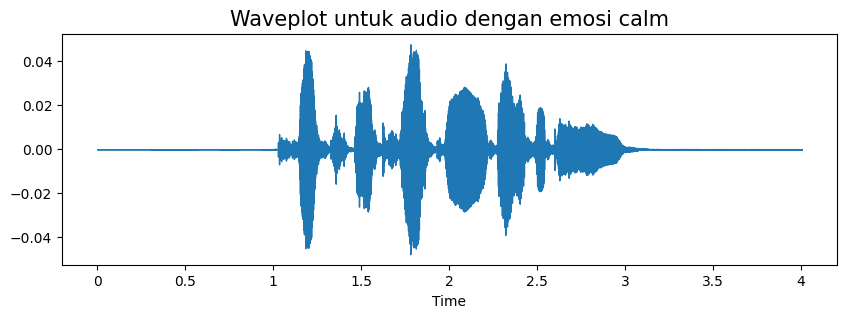

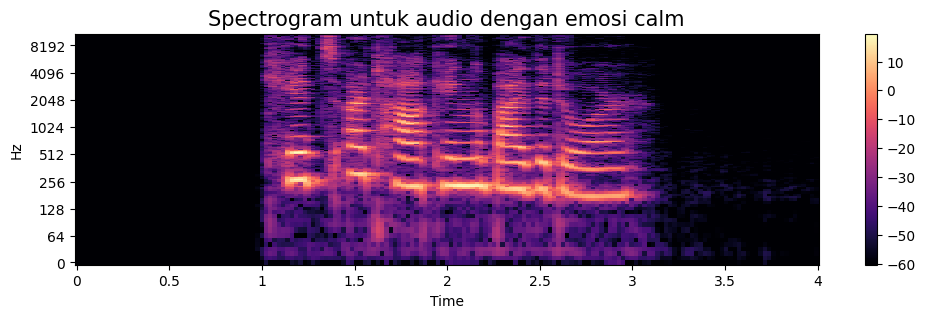

In [19]:
emotion = 'calm'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

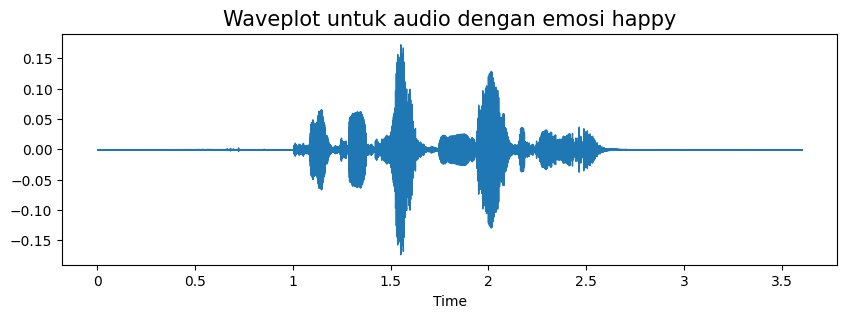

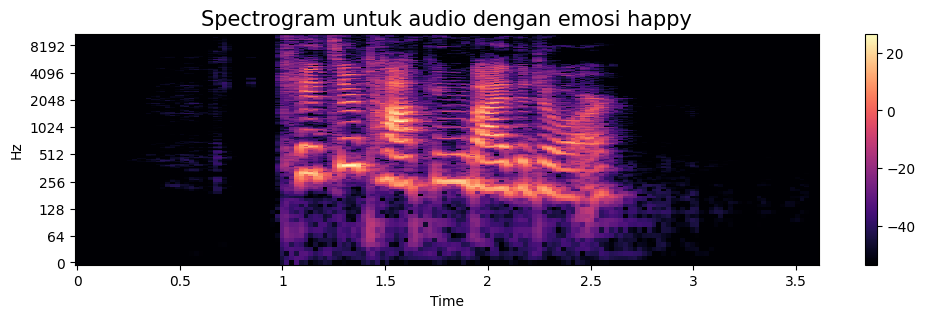

In [20]:
emotion = 'happy'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

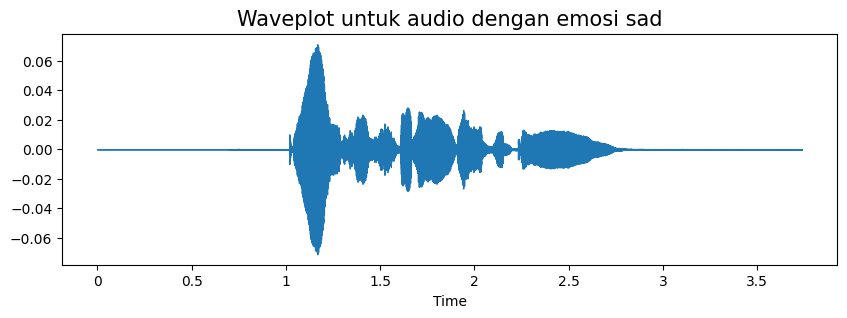

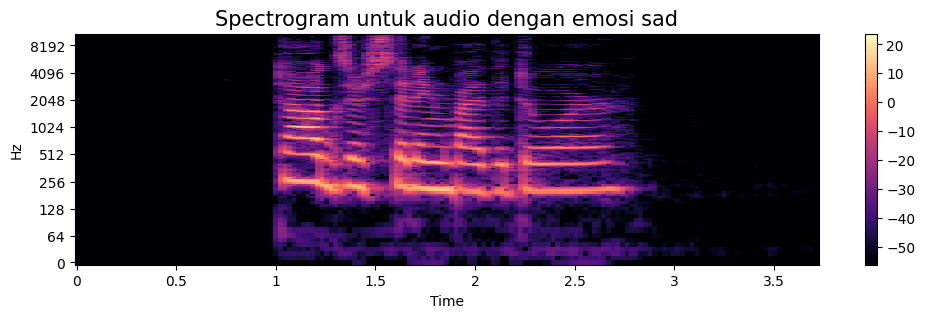

In [21]:
emotion = 'sad'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

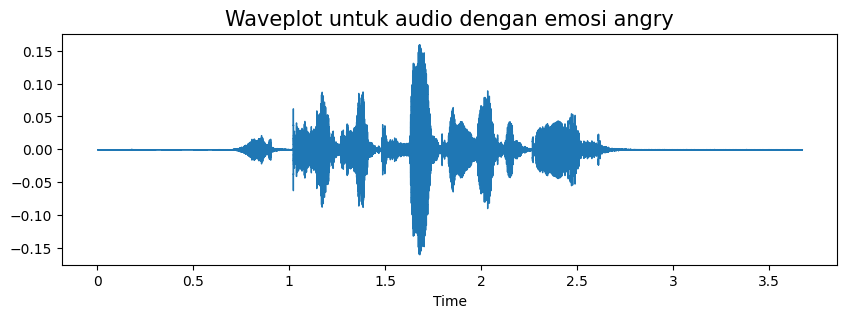

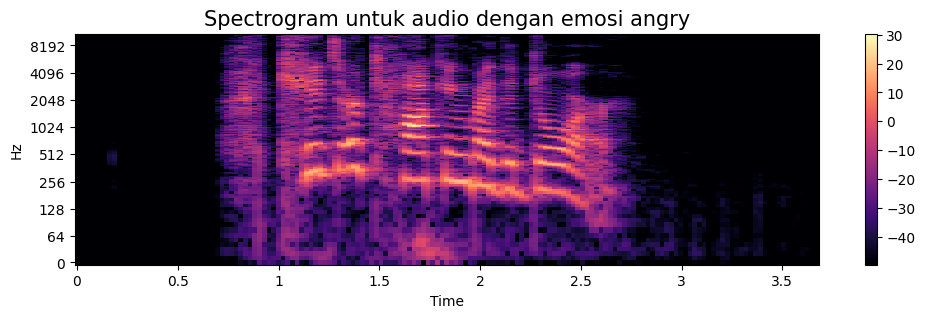

In [22]:
emotion = 'angry'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

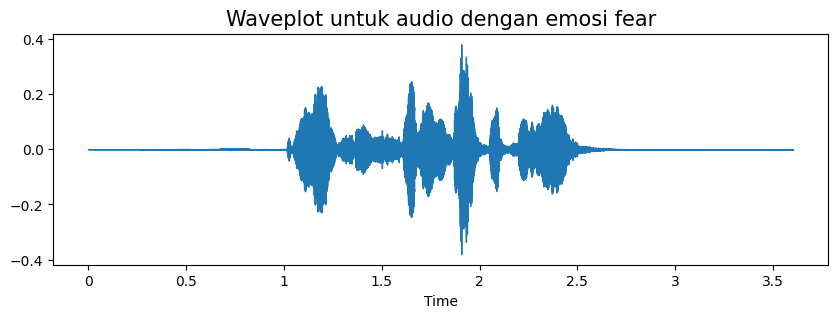

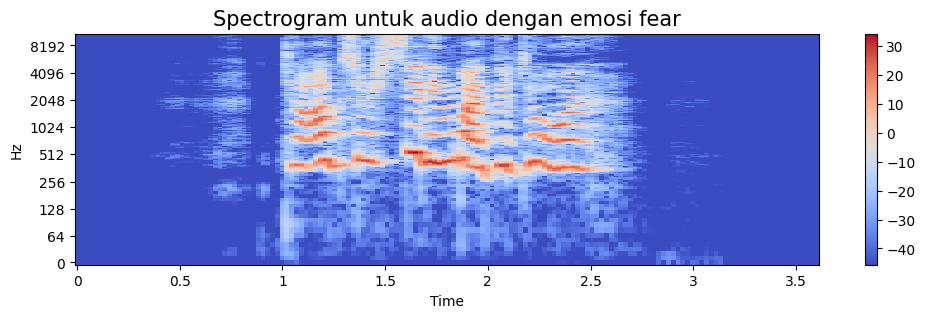

In [23]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

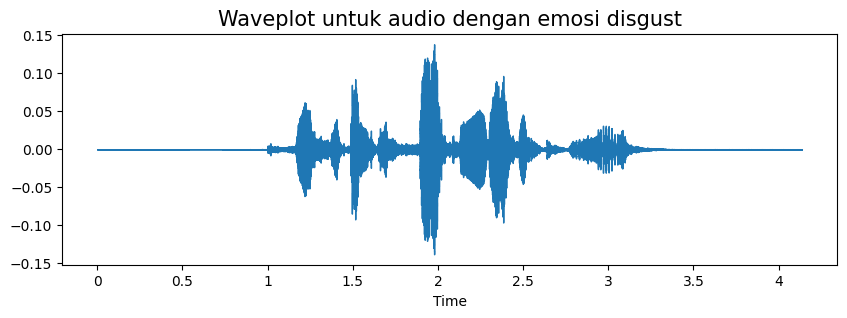

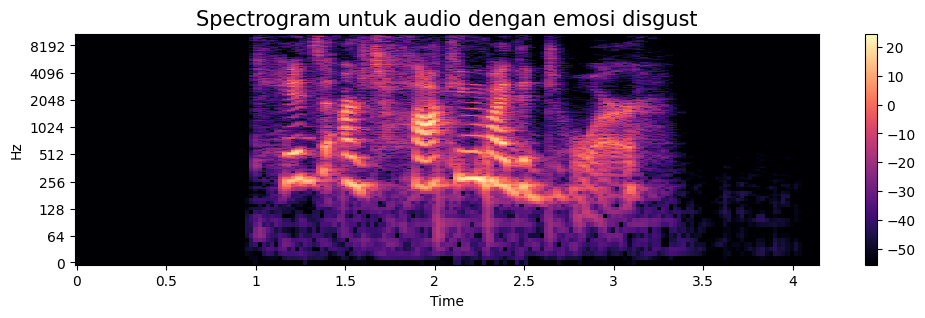

In [24]:
emotion = 'disgust'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

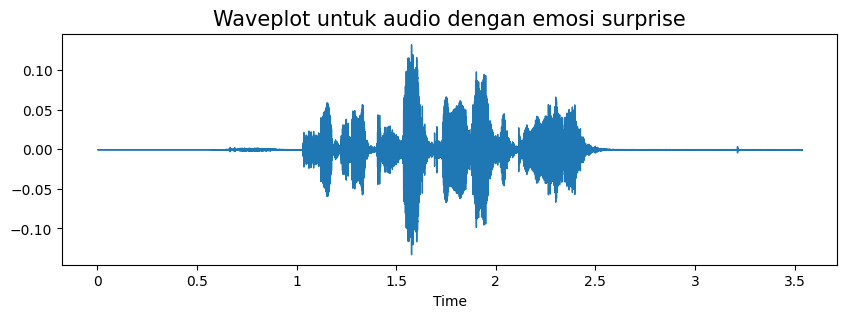

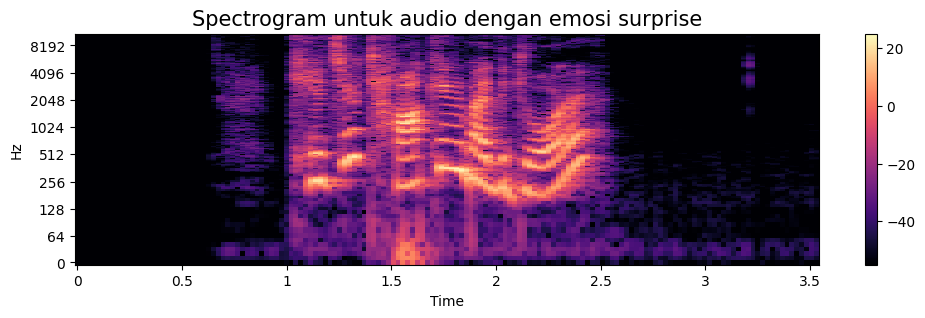

In [25]:
emotion = 'surprise'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Augmentasi (Masih Preprocessing)
Dengan menambahkan noise, stretch (menambah durasi), shift, dan pitch (mengubah frekuensi tinggi/rendah)

In [26]:
# Memuat file CSV data path
data_path_csv = '/kaggle/working/data_path.csv'
data_path = pd.read_csv(data_path_csv)

# Mendefinisikan fungsi augmentasi
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# Mengambil contoh dan memeriksa teknik augmentasi
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

### Contoh audio yang akan di augmentasi

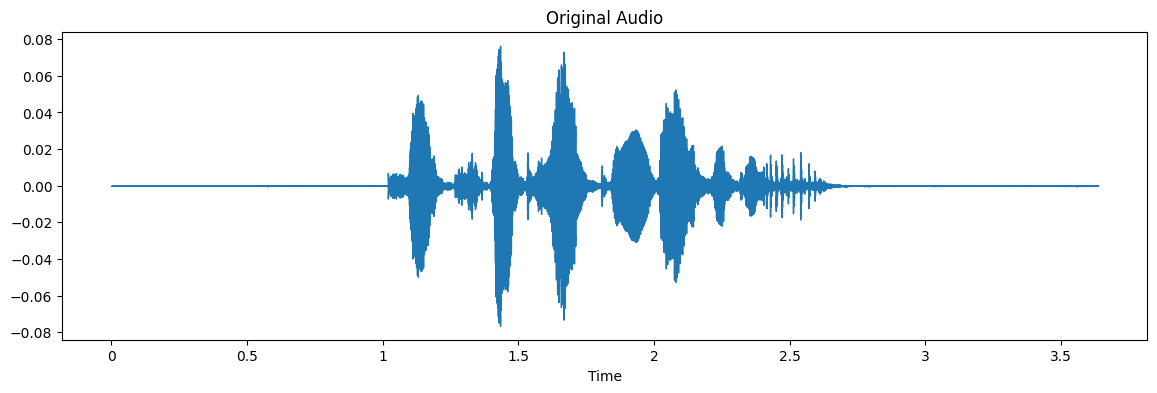

In [27]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title('Original Audio')
plt.show()

# Untuk memutar audio
display(Audio(data, rate=sample_rate))

### Noise

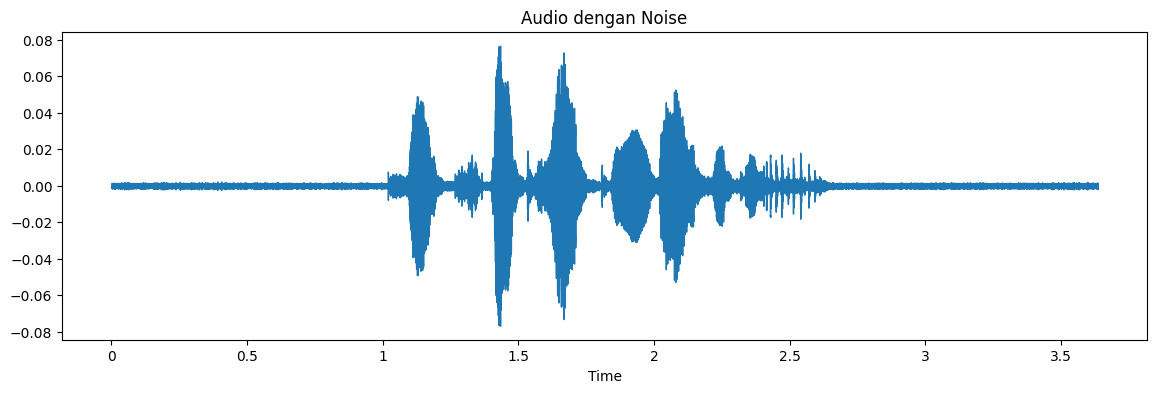

In [28]:
x = noise(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Audio dengan Noise')
plt.show()

display(Audio(x, rate=sample_rate))


### Stretching

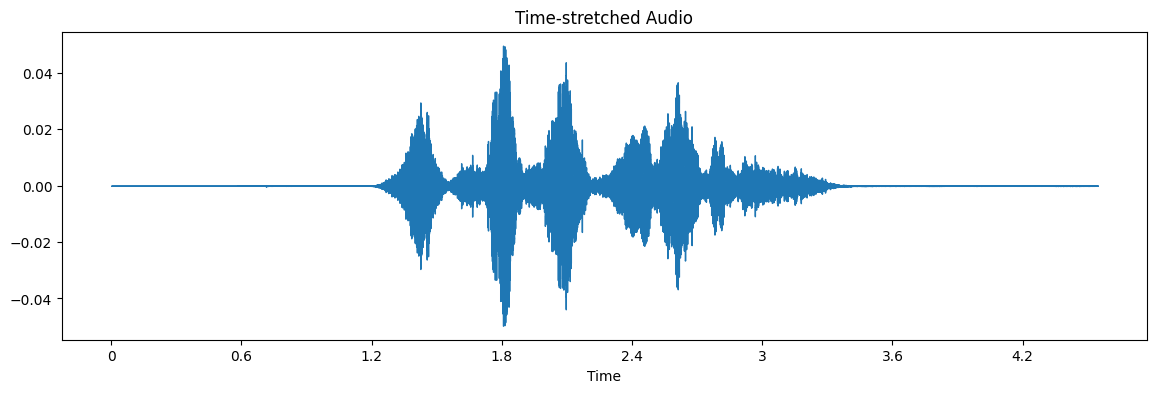

In [29]:
x = stretch(data, rate=0.8)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Time-stretched Audio')
plt.show()

display(Audio(x, rate=sample_rate))

### Shifting 

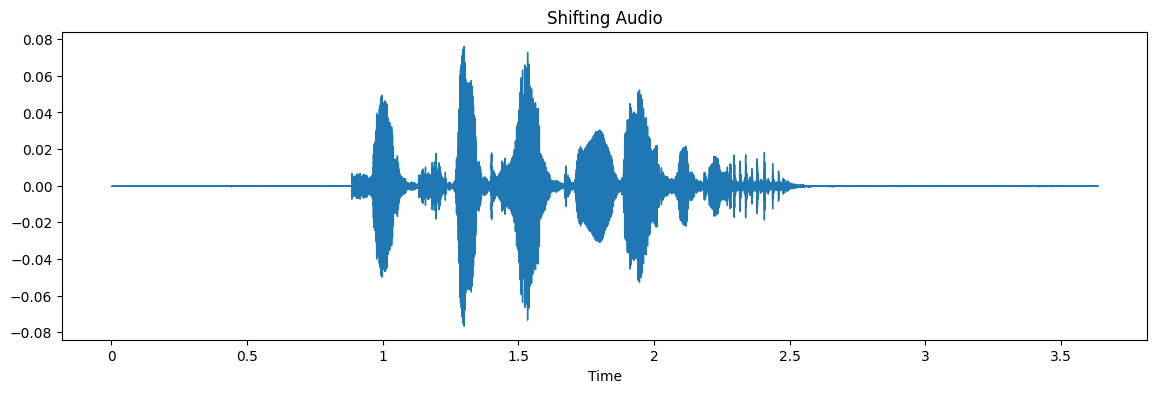

In [30]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Shifting Audio')
plt.show()

display(Audio(x, rate=sample_rate))

### Pitch

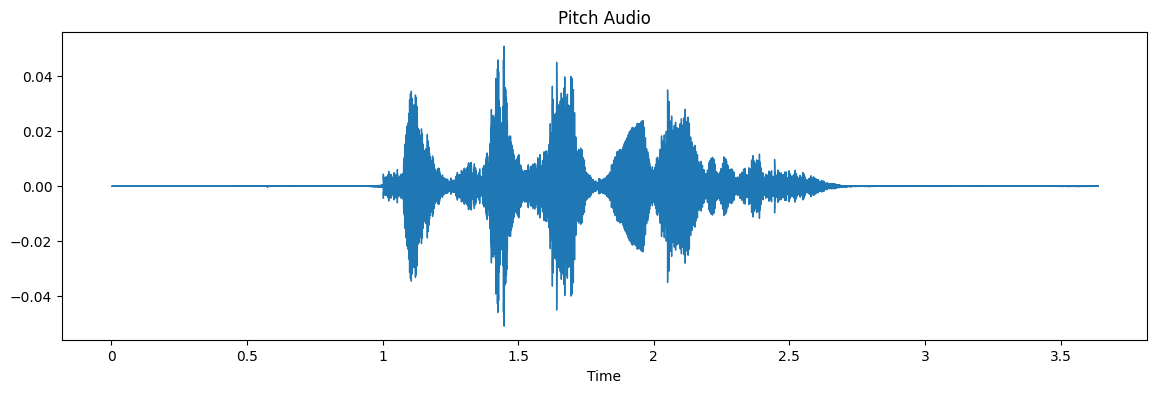

In [31]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Pitch Audio')
plt.show()

display(Audio(x, rate=sample_rate))

# Ekstraksi Fitur

In [32]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontal

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontal

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontal

    # Nilai Root Mean Square
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontal

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontal
    
    return result

def get_features(path):
    # durasi dan offset digunakan untuk mengatasi tidak adanya audio di awal dan akhir setiap file audio seperti yang terlihat di atas.
    data, sample_rate = librosa.load(path, duration=2, offset=0.6, sr=8025)
    
    # tanpa augmentasi
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data dengan noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertical
    
    # data dengan stretching dan pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertical
    
    return result

In [33]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # menambahkan emosi 3 kali karena kita telah melakukan 3 teknik augmentasi pada setiap file audio.
        Y.append(emotion)

In [34]:
len(X), len(Y), data_path.Path.shape

(4320, 4320, (1440,))

In [35]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.289017  0.624869  0.591969  0.615310  0.669669  0.719649  0.634625   
1  0.305176  0.670061  0.625739  0.649706  0.696442  0.748300  0.654659   
2  0.280566  0.632846  0.632784  0.622883  0.618108  0.655739  0.679184   
3  0.285156  0.641961  0.614199  0.555105  0.556997  0.456036  0.475114   
4  0.271637  0.672593  0.647227  0.583680  0.593669  0.499404  0.473273   

          7         8         9  ...       153       154       155       156  \
0  0.587322  0.538884  0.427593  ...  0.002605  0.001697  0.001417  0.001335   
1  0.568533  0.560217  0.497181  ...  0.002619  0.001763  0.001484  0.001378   
2  0.621179  0.629711  0.527281  ...  0.000674  0.000490  0.000628  0.000483   
3  0.461936  0.444155  0.550544  ...  0.000760  0.000480  0.000319  0.000480   
4  0.462135  0.479584  0.589119  ...  0.000767  0.000485  0.000322  0.000492   

        157       158       159       160       161    labels  
0  0.000906  0.001062  0.000865  0.000360  0.000033  surprise  
1  0.000952  0.001105  0.000907  0.000404  0.000068  surprise  
2  0.000417  0.000334  0.000250  0.000156  0.000008  surprise  
3  0.000163  0.000097  0.000162  0.000073  0.000004   neutral  
4  0.000171  0.000103  0.000169  0.000080  0.000010   neutral  

[5 rows x 163 columns]

# Mempersiapkan Data
Split train, test

In [36]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [37]:
# Karena ini adalah masalah klasifikasi multikelas, kita melakukan onehotencoding pada Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [38]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [39]:
# Menstandarkan data dengan StandardScaler dari sklearn
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [40]:
# Membuat data kompatibel dengan model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 8), (1080, 162, 1), (1080, 8))

# Modelling
CNN

In [41]:
model = Sequential()

# Layer pertama dengan input shape
model.add(Conv1D(256, 8, padding='same', input_shape=(x_train.shape[1], 1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))

# Layer kedua
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Dropout dan MaxPooling
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=8))

# Layer ketiga
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

# Layer keempat
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

# Layer kelima
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

# Layer keenam
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Dropout dan MaxPooling kedua
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=8))

# Layer ketujuh
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

# Layer kedelapan
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

# Flatten layer
model.add(Flatten())

# Dense layer untuk output
model.add(Dense(y_train.shape[1]))  # Target class number
model.add(Activation('softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 162, 256)       │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 162, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 20, 128)        │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 20, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 20, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 20, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 2, 64)          │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 2, 64)          │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         1,03

 Total params: 1,283,720 (4.90 MB)

 Trainable params: 1,282,952 (4.89 MB)

 Non-trainable params: 768 (3.00 KB)

In [42]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
 7/51 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1575 - loss: 2.0579

I0000 00:00:1719234874.347235     158 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 199ms/step - accuracy: 0.2241 - loss: 1.9550 - val_accuracy: 0.1815 - val_loss: 2.0364 - learning_rate: 0.0010
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3145 - loss: 1.7340 - val_accuracy: 0.2593 - val_loss: 1.9341 - learning_rate: 0.0010
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3598 - loss: 1.6295 - val_accuracy: 0.1935 - val_loss: 1.9642 - learning_rate: 0.0010
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4058 - loss: 1.5564 - val_accuracy: 0.3630 - val_loss: 1.6447 - learning_rate: 0.0010
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4345 - loss: 1.4731 - val_accuracy: 0.3852 - val_loss: 1.5727 - learning_rate: 0.0010
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4404 - loss: 1.4277 - val_accuracy: 0.2333 - val_loss: 2.0540 - learning_rate: 0.0010
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4782 - loss: 1.3666 - val_accuracy: 0.

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8000 - loss: 0.8692
Akurasi dari model pada data test :  78.05555462837219 %




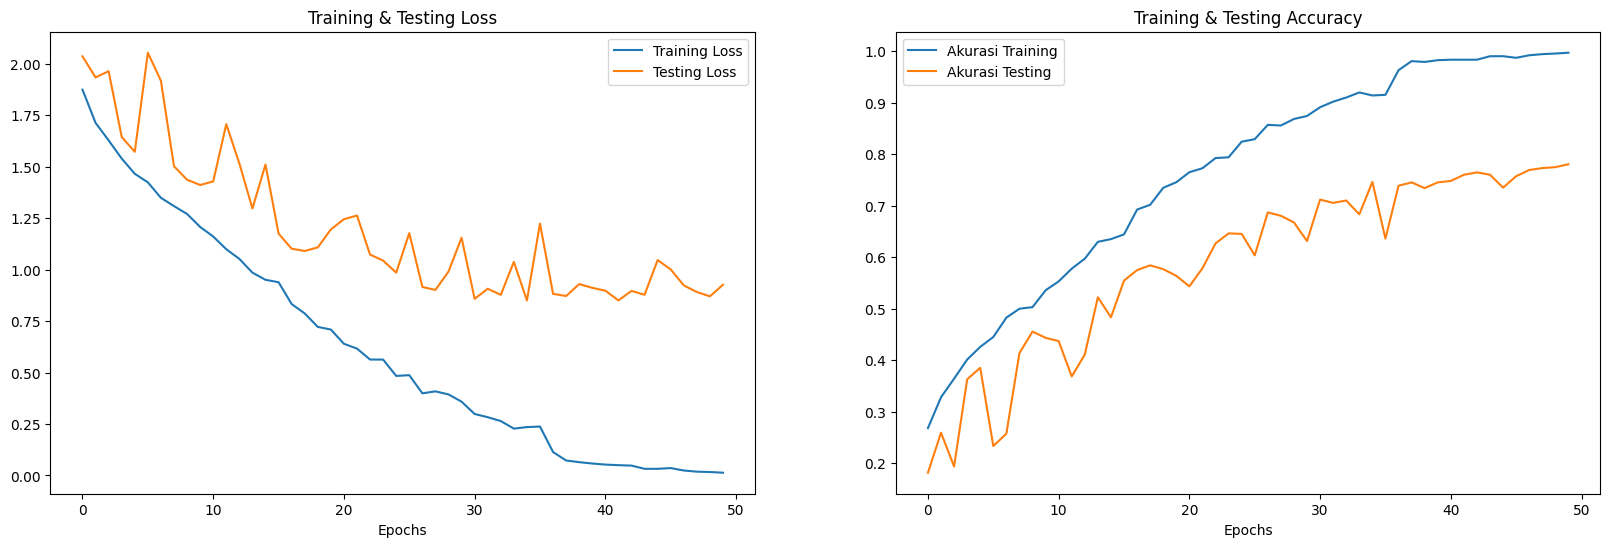

In [43]:
print("Akurasi dari model pada data test : " , model.evaluate(x_test,y_test)[1]*100 , "%")
print("\n")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Akurasi Training')
ax[1].plot(epochs , test_acc , label = 'Akurasi Testing')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [44]:
# Memprediksi pada data uji.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [45]:
df = pd.DataFrame(columns=['Label Prediksi', 'True Label'])
df['Label Prediksi'] = y_pred.flatten()
df['True Label'] = y_test.flatten()

df.head(10)

Label Prediksi True Label
0           fear       fear
1        neutral    neutral
2          happy        sad
3        neutral    neutral
4           fear       fear
5        disgust      angry
6           fear       fear
7           fear       fear
8        disgust    disgust
9           calm       calm

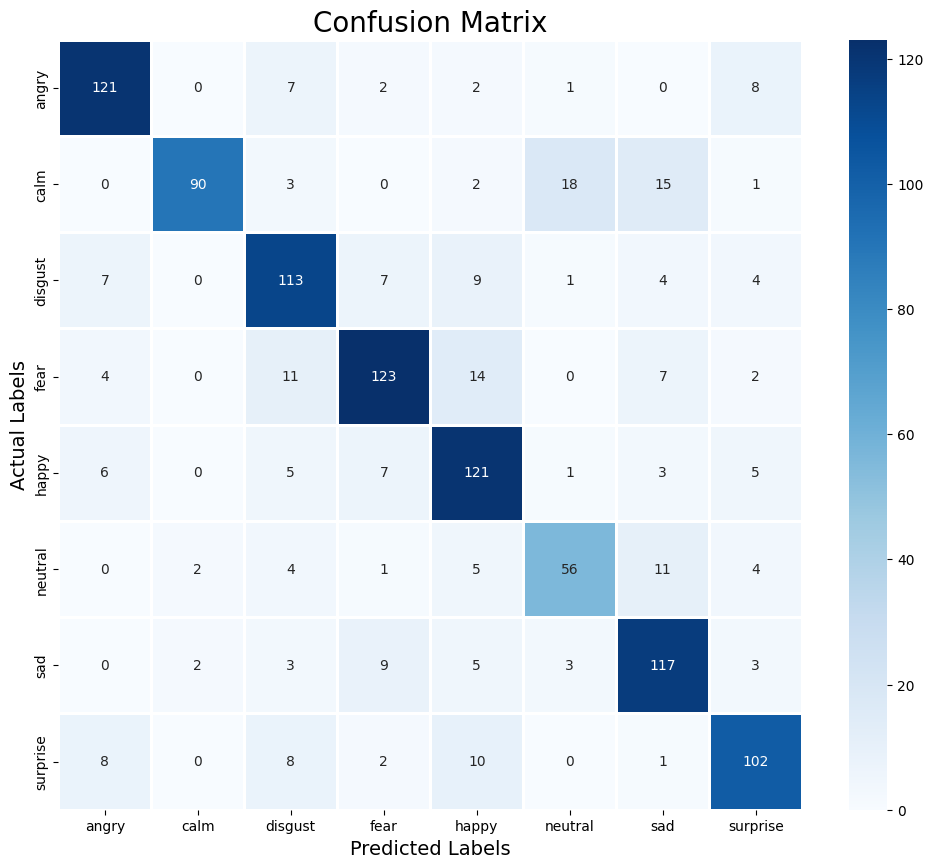

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.83      0.86      0.84       141
        calm       0.96      0.70      0.81       129
     disgust       0.73      0.78      0.76       145
        fear       0.81      0.76      0.79       161
       happy       0.72      0.82      0.77       148
     neutral       0.70      0.67      0.69        83
         sad       0.74      0.82      0.78       142
    surprise       0.79      0.78      0.78       131

    accuracy                           0.78      1080
   macro avg       0.79      0.77      0.78      1080
weighted avg       0.79      0.78      0.78      1080



In [48]:
# Import necessary libraries
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Activation, BatchNormalization, Dropout, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop

# Define the Keras model creation function
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv1D(256, 8, padding='same', input_shape=(x_train.shape[1], 1)))
    model.add(Activation('relu'))
    model.add(Conv1D(256, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=8))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=8))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(y_train.shape[1]))
    model.add(Activation('softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [49]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 162, 256)       │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 162, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 20, 128)        │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 20, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 20, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 20, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 2, 64)          │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 2, 64)          │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         1,03

 Total params: 3,849,626 (14.69 MB)

 Trainable params: 1,282,952 (4.89 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 2,565,906 (9.79 MB)

# K-fold Cross Validation & Hyperparamerter Tuning

In [50]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 50],
    'optimizer': ['adam', 'rmsprop']
}

In [51]:
# Function to perform grid search with k-fold cross-validation
def perform_grid_search(x_train, y_train, param_grid):
    best_score = 0
    best_params = None
    for batch_size in param_grid['batch_size']:
        for epochs in param_grid['epochs']:
            for optimizer in param_grid['optimizer']:
                kfold = KFold(n_splits=5, shuffle=True, random_state=42)
                fold_scores = []
                for train_idx, val_idx in kfold.split(x_train):
                    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
                    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
                    
                    model = create_model(optimizer)
                    model.fit(x_train_fold, y_train_fold, batch_size=batch_size, epochs=epochs, verbose=0)
                    
                    score = model.evaluate(x_val_fold, y_val_fold, verbose=0)
                    fold_scores.append(score[1])  # accuracy
                    
                avg_score = np.mean(fold_scores)
                if avg_score > best_score:
                    best_score = avg_score
                    best_params = {'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer}
                    
    return best_score, best_params

In [52]:
# Perform grid search
best_score, best_params = perform_grid_search(x_train, y_train, param_grid)
print(f"Sckor Terbaik: {best_score}")
print(f"Parameter Terbaik: {best_params}")

Sckor Terbaik: 0.6367284059524536
Parameter Terbaik: {'batch_size': 32, 'epochs': 50, 'optimizer': 'rmsprop'}


In [53]:
# Train the final model with best parameters
final_model = create_model(best_params['optimizer'])
final_model.fit(x_train, y_train, batch_size=best_params['batch_size'], epochs=best_params['epochs'], verbose=1)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.2009 - loss: 1.9787
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2701 - loss: 1.8058
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3226 - loss: 1.7330
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3752 - loss: 1.6125
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4049 - loss: 1.5406
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3993 - loss: 1.5000
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4477 - loss: 1.4377
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4628 - loss: 1.4007
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4697 - loss: 1.3439
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5145 - loss: 1.2696
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4988 - loss: 1.2818
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/st

In [64]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit the label encoder on the y_test labels
y_test_encoded = label_encoder.fit_transform(y_test)

# Ensure y_test is one-hot encoded
y_test_one_hot = to_categorical(y_test_encoded, num_classes=8)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(x_test, y_test_one_hot)
print(f"Akurasi pada data test: {test_accuracy}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6930 - loss: 1.1218
Akurasi pada data test: 0.675000011920929


# Save model

In [70]:
import tensorflow as tf

# Assuming `model` is your trained model
model.save('model.h5')